In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(font_scale=1.2)

In [2]:
df=pd.read_csv('911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,month,day of week,Year
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu,2015
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu,2015
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu,2015


In [3]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e',
       'Reason', 'hour', 'month', 'day of week', 'Year'],
      dtype='object')

In [4]:
df = df[['twp', 'Reason', 'hour', 'month', 'day of week', 'Year']]
df.head()

,twp,Reason,hour,month,day of week,Year
0,NEW HANOVER,EMS,17,12,Thu,2015
1,HATFIELD TOWNSHIP,EMS,17,12,Thu,2015
2,NORRISTOWN,Fire,14,12,Thu,2015
3,NORRISTOWN,EMS,16,12,Thu,2015
4,LOWER POTTSGROVE,EMS,16,12,Thu,2015


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115211 entries, 0 to 115210
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   twp          115177 non-null  object
 1   Reason       115211 non-null  object
 2   hour         115211 non-null  int64 
 3   month        115211 non-null  int64 
 4   day of week  115211 non-null  object
 5   Year         115211 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 5.3+ MB


In [6]:
df.describe()

,hour,month,Year
count,115211.000000,115211.000000,115211.000000
mean,13.064759,5.539714,2015.931291
std,5.662017,3.115296,0.252959
min,0.000000,1.000000,2015.000000
25%,9.000000,3.000000,2016.000000
50%,13.000000,5.000000,2016.000000
75%,17.000000,8.000000,2016.000000
max,23.000000,12.000000,2016.000000


## From the above analysis There are no numerical features so we will be only using count blots with hue parameter for some extra information


<AxesSubplot:xlabel='twp', ylabel='count'>

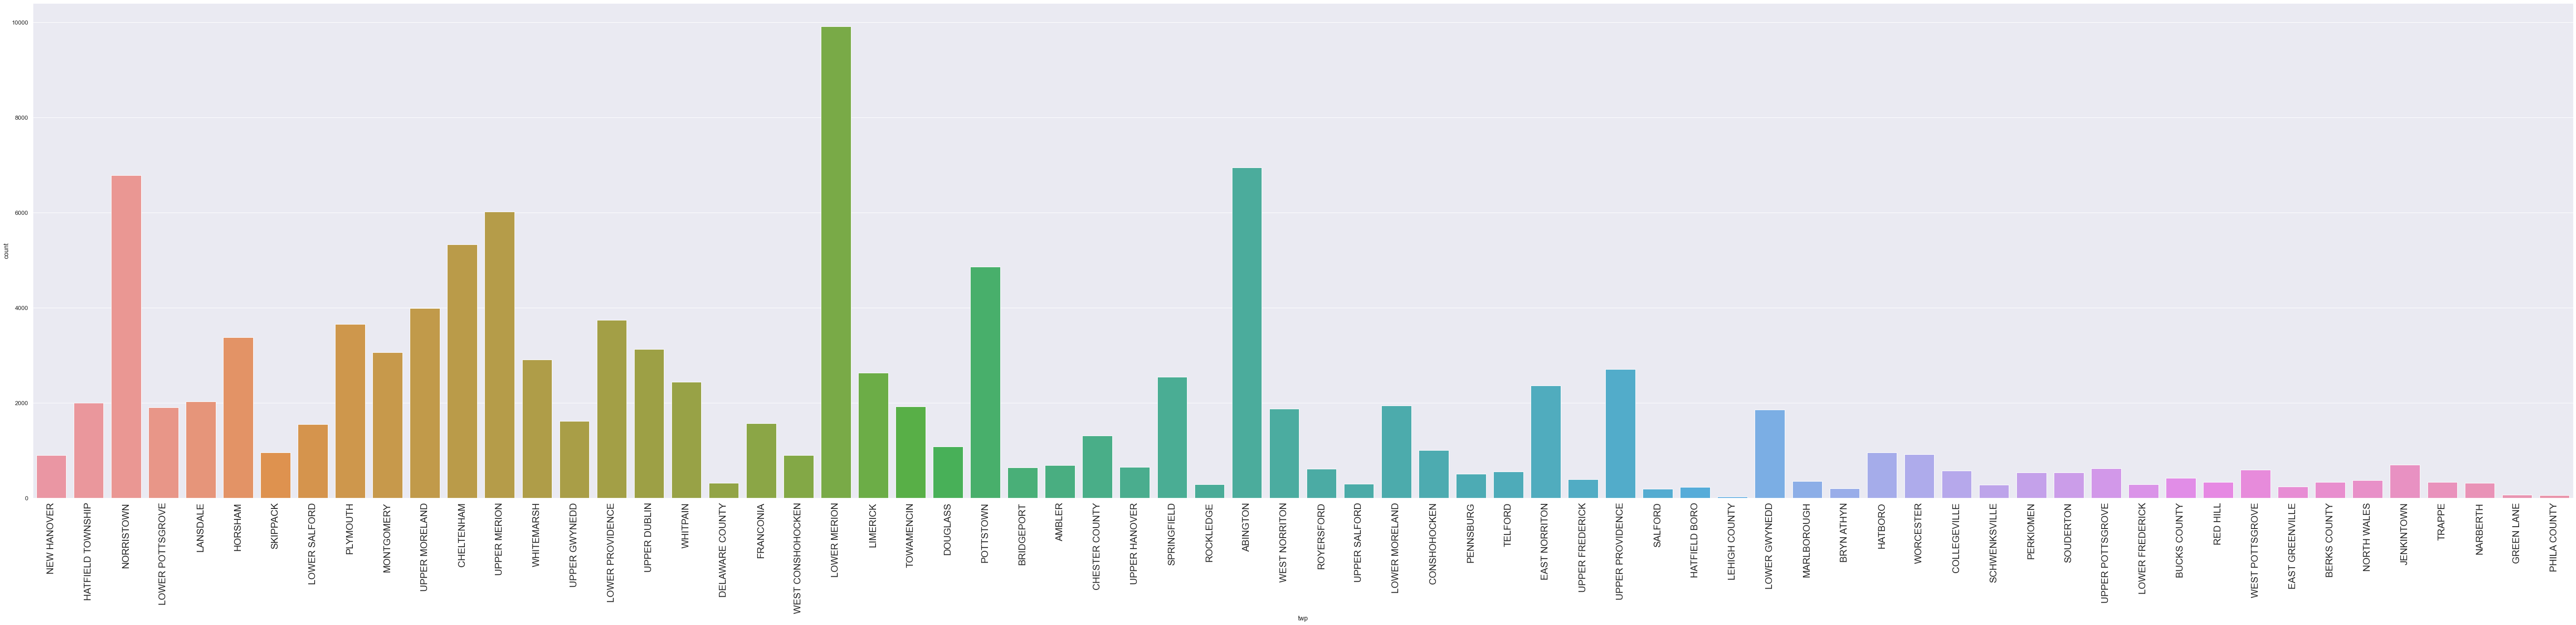

In [7]:
plt.figure(figsize=(100,20))
fig=sns.countplot(x='twp',data=df)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90,fontsize='x-large')
fig

In [8]:
df['twp'].value_counts().head()

LOWER MERION    9912
ABINGTON        6949
NORRISTOWN      6782
UPPER MERION    6021
CHELTENHAM      5334
Name: twp, dtype: int64

From the above analysis it is concluded that the top five towns in calls are LOWER MERION, ABINGTON,NORRISTOWN,UPPER MERION and CHELTENHAM.

<AxesSubplot:xlabel='Reason', ylabel='count'>

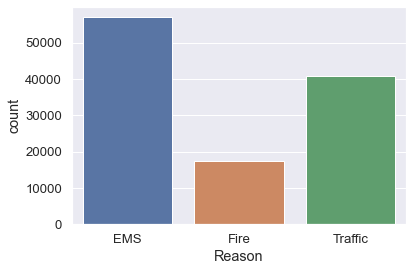

In [9]:
sns.countplot(x='Reason',data=df)

* Majority of reasons are Ems and Traffic. Fire reason is relatively low
 

<AxesSubplot:xlabel='Year', ylabel='count'>

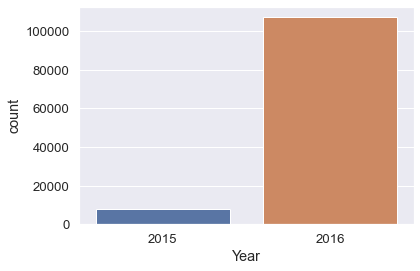

In [10]:
sns.countplot(data=df,x='Year')

* From the above figure it is concluded that most 911 calls were in 2016 

<AxesSubplot:xlabel='Year', ylabel='count'>

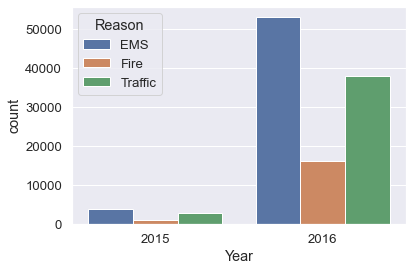

In [11]:
sns.countplot(x='Year',data=df,hue='Reason')


* Reasons have the about same percentage in every year

<AxesSubplot:xlabel='day of week', ylabel='count'>

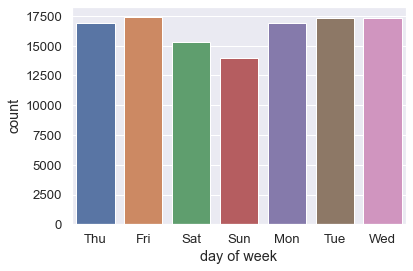

In [12]:
sns.countplot(data=df,x='day of week')

* calls are about the same all days of the week but holidays(sat,sun) are relatively lower 

<AxesSubplot:xlabel='day of week', ylabel='count'>

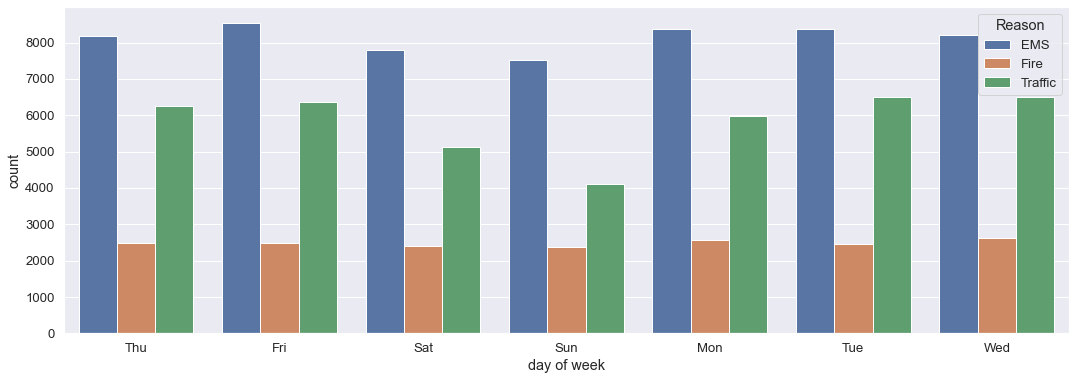

In [13]:
plt.figure(figsize=(18,6))
sns.countplot(data=df,x='day of week',hue='Reason')

* calls for traffic reason are relatively low during holidays(sat,sun)

<AxesSubplot:xlabel='month', ylabel='count'>

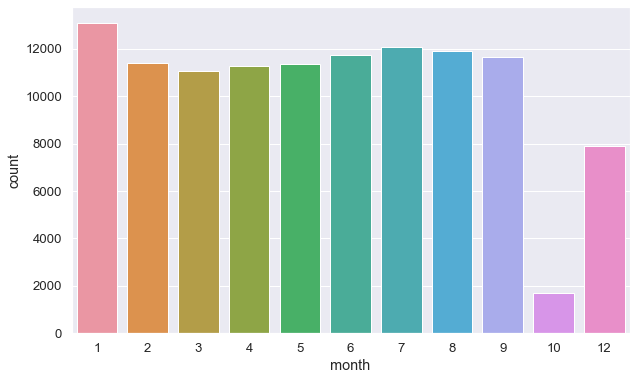

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='month')

calls are equal in most of the months but a few calls in 10 and no calls at all in 11 

<AxesSubplot:xlabel='month', ylabel='count'>

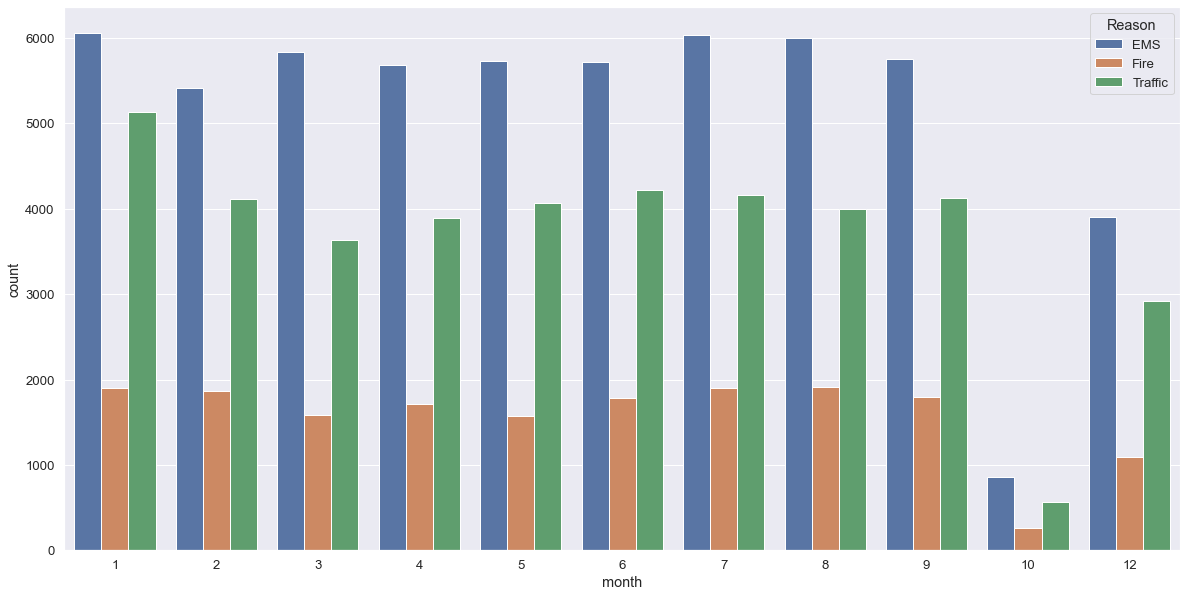

In [15]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x='month',hue='Reason')

- again there are no calls in 11 and a few calls in 10 
- in the duration of 1:9 months January has the highest traffic while March has the lowest

<AxesSubplot:xlabel='month', ylabel='count'>

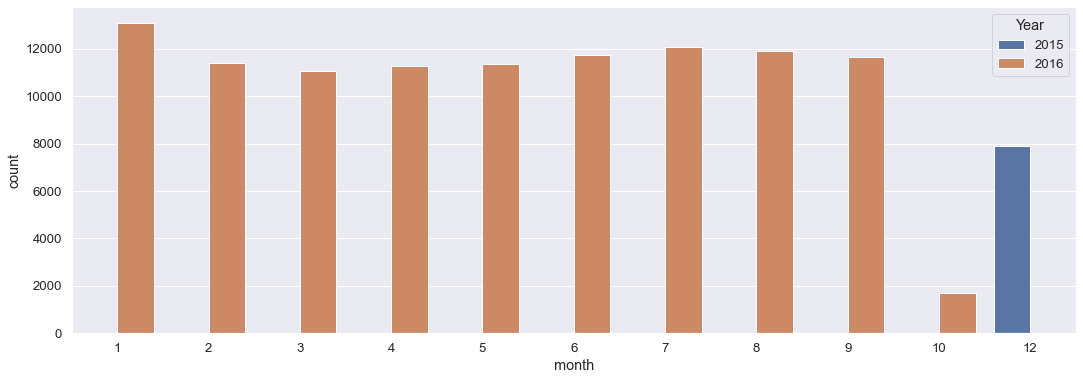

In [16]:
plt.figure(figsize=(18,6))
sns.countplot(data=df,x='month',hue='Year')

It looks like that collecting data was only between 12/2015 until 10/2016

<AxesSubplot:xlabel='hour', ylabel='count'>

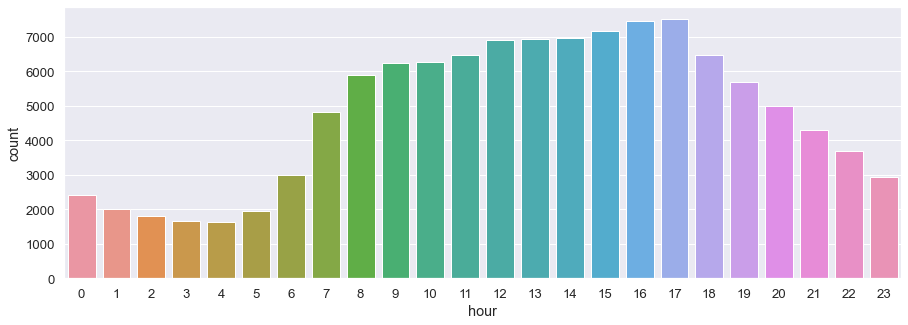

In [17]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='hour')

Calls are made all day long but the majority are around 8:18

<AxesSubplot:xlabel='hour', ylabel='count'>

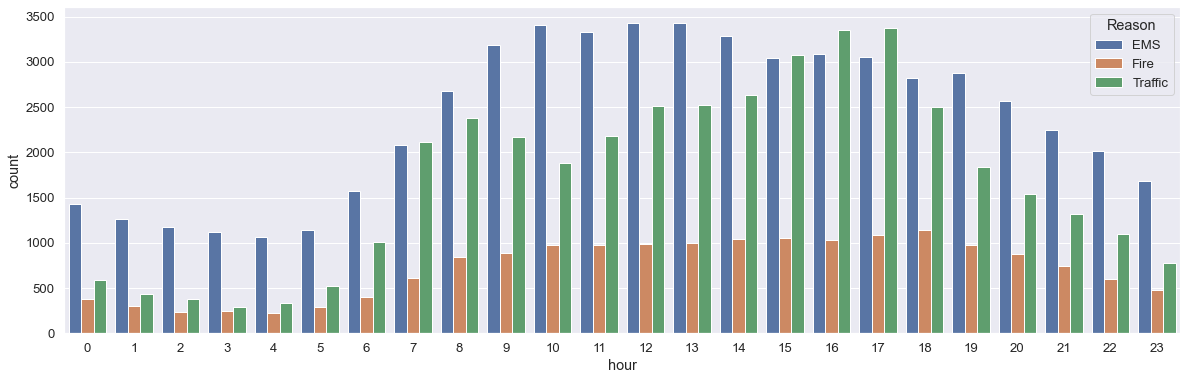

In [18]:
plt.figure(figsize=(20,6))
sns.countplot(data=df,x='hour',hue='Reason')


- again calls are more during day
- but during rush hours 15:17 traffic calls are more than or equal to EMS calls and there are also rush hours during morning 7,8 